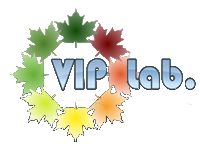

In [9]:
from IPython.display import Image
img = Image('https://vip.arizona.edu/images/logoviplab.png')
img

# BE 485/585
## SPECIFY DATE
## FULL NAME  <br>
In this exercise:<br>
<ol>
  <li>read data from an Excel file</li>
  <li>user defined functions</li>
  <li>Resampling
    <ol>
        <li>Loop pixels by row and columns</li>
        <li>Get subsets</li>
        <li>Get average of subsets</li>
        <li>Create a computed image</li>
    </ol>
   </li>
</ol>

In [2]:
# load library modules 
import os # Load the Operating System library to access & manipulate files and  DIRs
import xlrd # Load the library that reads Exel sheets
import numpy as np # Load the famous NUMPY library the most useful library in  Python
import matplotlib.pyplot as plt # Load the graphing/plotting library
import matplotlib.image as mpimg
import viplab_lib as vip # Load our very own home brewed library it has few additinol things to help image procesing

# Resampling Function so we can reuse it 

In [3]:
# Here we will create a function that resamples data from any resolution to any resolution. Very useful so keep it handy always when needed 
# This function resamples an image to a user defined space

# In Python we declare then define the function first, then we can refer to it and use it throughout the code/program
# This could also be added to a library 

# Just use this code try to understyand it will become clearer as we proceed with the course

def resample_data(data,n): # When we call the function we pass it the data and the scaling/resamplng factor 
    #get size of input band
    nrowsIN,ncolsIN=data.shape
    #calculate output band size
    nrows=nrowsIN // n
    ncols=ncolsIN // n
    
    #create empty band
    datares=np.zeros((nrows,ncols))
    for i in range(0,nrows):
        for j in range(0,ncols):
            
            #calculate row at input band
            rowIN=i*n
            #check for out of boundary row
            if(rowIN<0):
                rowIN=0
            elif (rowIN>nrowsIN-1):
                rowIN=nrowsIN-1
                
            #calculate col at input band    
            colIN=j*n
            #check for out of boundary column
            if(colIN<0):
                colIN=0
            elif (colIN>ncolsIN-1):
                colIN=nrowsIN-1
            
            
            #subset and get average
            avgvalue=np.mean(data[rowIN:rowIN+n,colIN:colIN+n])
            
            #get the integer value of the average
            datares[i,j]= int(avgvalue)
    return datares


# Open Old Main Image (RGB)

In [4]:
#Load the image 
img = mpimg.imread('./UA_Old_Main.jpg') # Load the whole image into a 3D Array that ahs the REd/Green/Blue

# Speate the layer (Using Python slicing on the third dimension)
DataRed = img[:, :, 0]
DataGreen = img[:, :, 1]
DataBlue = img[:, :, 2]

In [5]:
# Perform the Resampling and display results 

In [ ]:
# Resample the data 
# Resample the original image 
# To 4x4

print("Resampling 4x4")
DataRed_Res4=resample_data(DataRed,4)

# Resample 8x8
print("Resampling 8x8")
DataRed_Res8=resample_data(DataRed,8)

# Resample 20x20
print("Resampling 20x20")
DataRed_Res20=resample_data(DataRed,20)


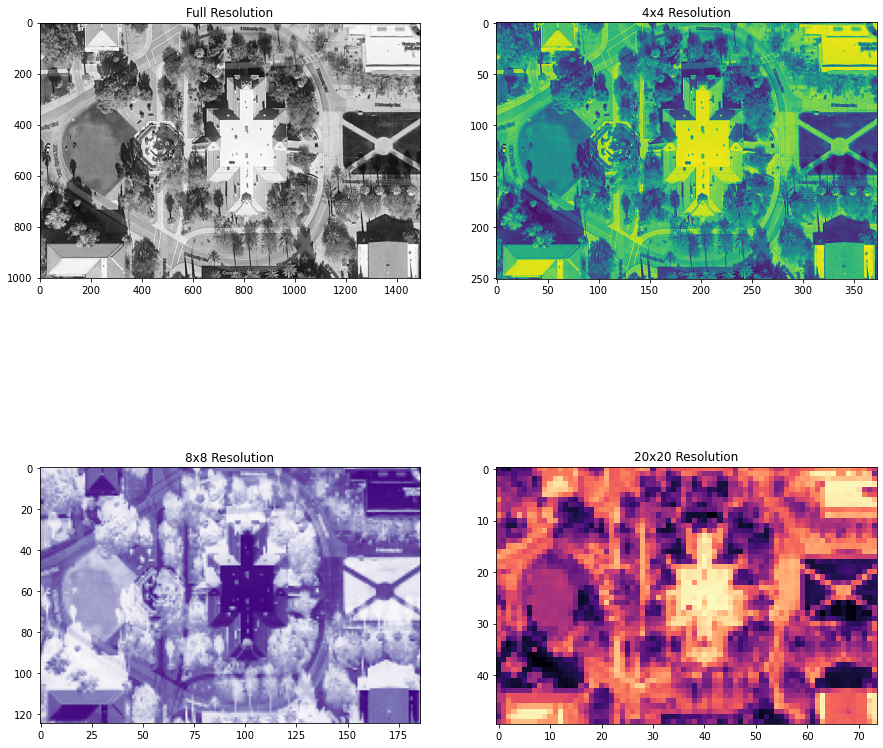

In [18]:
# Let's look at the data we've just read, then resame it to different sizes/resolutions and display it

f, Plot_Arr = plt.subplots(2,2,figsize=(15, 15))  # We can create a canvas of 2 by 2 plots (total of four) and define its size

#Pay attention to the way we pass the plot to the grid on the Canvas 

Plot_Arr[0,0].imshow(DataRed,cmap='gray')     # Original data full resolution  
Plot_Arr[0,0].title.set_text('Full Resolution')  # Assign title to plot 


Plot_Arr[0,1].imshow(DataRed_Res4,cmap='viridis') # Resmapled 4x4 resolution 
Plot_Arr[0,1].title.set_text('4x4 Resolution')

Plot_Arr[1,0].imshow(DataRed_Res8,cmap='Purples') # Resmapled 8x8 resolution 
Plot_Arr[1,0].title.set_text('8x8 Resolution')

Plot_Arr[1,1].imshow(DataRed_Res20,cmap='magma') # Resmapled 20x20 resolution 
Plot_Arr[1,1].title.set_text('20x20 Resolution')

# Try these color maps [cmaps]
# 'viridis','plasma','inferno','magma', 'cividis',
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd',
# 'OrRd','PuRd','RdPu','BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'



In [19]:
# Use the shape call to find the size of the image
#It will display Numbe of ROWS, PIXELS, Bands
print(img.shape)

(1004, 1493, 3)


# To Do : Homework 
## Use the methods above to:
 <ol>
  <li>Your job is to modify the code so it resamples all the bands</li>
  <li>Then combine them into a single true color image and dispaly</li>
</ol>

In [ ]:
print("End of program.")